Demonstrating the efficacy of Bartlett's Method and Welch's Method

In [293]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from numpy.fft import fft

In [294]:
nSamples = 2**20
x = random.randn(nSamples)

# Periodogram

In [302]:
def periodogram(x):
    # DTFT
    X = fft(x)
    X_periodogram = ((np.abs(X))**2)/nSamples

    return X_periodogram

# Bartlett's Method

In [296]:
def bartlett(x,bin_size=256):
    bins = int(nSamples/bin_size)-1

    X_B = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
    m = 0
    for k in range(bins):
        s = x[m:m+bin_size]
        Xs = fft(s)
        Xs_periodogram = (np.abs(Xs)**2) / bin_size
        X_B += Xs_periodogram
        
        m += bin_size

    X_B /= bins

    return X_B

# Welch's Method

In [297]:
def welch(x,bin_size=256,m_inc=128):
    bins = int(nSamples / m_inc)-1

    window_function = np.hamming(bin_size)
    U = np.sum(window_function**2)/bin_size # average energy of the window function

    X_W = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
    m = 0
    for k in range(bins):
        s = x[m:m+bin_size] * window_function
        Xs = fft(s)
        Xs_periodogram = (np.abs(Xs)**2) / (bin_size*U)
        X_W += Xs_periodogram
        
        m += m_inc # allow segment overlap!

    X_W /= bins

    return X_W

# Visualisation

Periodogram
Mean:       0.9983995089437959
Variance:   1.0003459529056251

Bartlett with Bin Size 64
Mean:       0.9984113929531957
Variance:   5.953824445324337e-05

Welch with Bin Size 64
Mean:       0.9981238183486822
Variance:   3.394390713599215e-05

Bartlett with Bin Size 128
Mean:       0.9984153275684748
Variance:   0.0001378321007095625

Welch with Bin Size 128
Mean:       0.9981322621526713
Variance:   7.35828813534674e-05

Bartlett with Bin Size 256
Mean:       0.9983853263227473
Variance:   0.00023036333102337167

Welch with Bin Size 256
Mean:       0.9986363664024085
Variance:   0.0001407922337147941

Bartlett with Bin Size 512
Mean:       0.9983699002159461
Variance:   0.000502467339757101

Welch with Bin Size 512
Mean:       0.9984796648133858
Variance:   0.00026842843781634673

Bartlett with Bin Size 1024
Mean:       0.998356481609532
Variance:   0.0010553654377727457

Welch with Bin Size 1024
Mean:       0.9979886149851347
Variance:   0.0005618292622607056

Bartlett wi

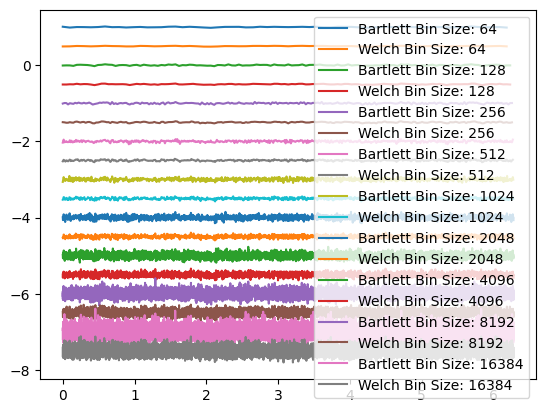

In [304]:
X = periodogram(x)
print(f"Periodogram")
print(f"Mean:       {np.mean(X)}")
print(f"Variance:   {np.var(X)}")
print()

bin_sizes = [64,128,256,512,1024,2048,4096,8192,16384][::-1]
for j,bin_size in enumerate(bin_sizes):
    X = bartlett(x,bin_size)
    w = 2*np.pi * np.arange(len(X))/len(X)
    plt.plot(w,X-j,label=f"Bartlett Bin Size: {bin_size}")
    print(f"Bartlett with Bin Size {bin_size}")
    print(f"Mean:       {np.mean(X)}")
    print(f"Variance:   {np.var(X)}")
    print()

    X = welch(x,bin_size,m_inc=int(bin_size/2))
    w = 2*np.pi * np.arange(len(X))/len(X)
    plt.plot(w,X-j-0.5,label=f"Welch Bin Size: {bin_size}")
    print(f"Welch with Bin Size {bin_size}")
    print(f"Mean:       {np.mean(X)}")
    print(f"Variance:   {np.var(X)}")
    print()

plt.legend()
plt.show()